# Project: TMDB Database Analysis

## Introduction:
This data set contains nearly 11,000 movies with every detail about the movie; budget, revenue cast, directors, released year, and many columns. This analysis aims to provide insights that helps seeing things that aren't visible or may be unnoticed.
#### Research Questions:
<ul>
    <li><a href="#q1">Year with highest release of movies</a></li>
    <li><a href="#q2">Movie with highest \ lowest revenue, budget</a></li>
    <li><a href="#q3">The genre that generates the most revenue</a></li>
    <li><a href="#q4">Does runtime affect votes</a></li>
    <li><a href="#q5">Which year has the most revenue?</a></li>
    <li><a href="#q6">Which month generates the most popularity?</a></li>
    <li><a href="#q7">Top 10 directors that generate popularity</a></li>
    <li><a href="#q8">Top 10 genres that generate revenue</a></li>
    <li><a href="#q9">Highest average votes for 10 movies</a></li>
    <li><a href="#q10">Does the budget affect ratings?</a></li>
    <li><a href="#q11">Popularity Trending Over Time</a></li>
    <li><a href="#q12">Runtime Trending Over Time</a></li>
</ul>    

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
I selected the IMDB database for this analysis, below is the cell for libraries used in this analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### Required Function

In [1]:
def addLabelsOnGraphs(xlabel,ylabel,title,plt):
    #adding title to plot
    plt.title(title)
    #adding x-axis label to plot
    plt.xlabel(xlabel)
    #adding y-axis label to plot
    plt.ylabel(ylabel)
    return plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
df = pd.read_csv('tmdb-movies.csv')

## Changed release_date type to datetime instead of string

In [6]:
#changing column datatype from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

### Data Cleaning (Replace this with more specific notes!)

##### Dropped homepage; too many NaNs low count in comparison with total amount of rows, also its irrelevant.
##### Dropped id, imdbID; no use for them in this analysis.
##### Dropped keywords, tagline; no use for them


In [7]:
#dropping columns
df.drop(['tagline','homepage','keywords','id','imdb_id'],axis=1,inplace=True)

In [6]:
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#counting the sum of nulls
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Dropping missing rows in cast, director, genres, overview

In [9]:
#dropping null values
df.dropna(subset=['cast','director','genres','overview'],inplace=True)

In [8]:
df.isnull().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
overview                  0
runtime                   0
genres                    0
production_companies    957
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

### Filling column production_companies null values with forward filling, as it has too many null values so the rows shouldn't be dropped in my opinion

In [10]:
#forward filling the missing values
df['production_companies'].ffill(inplace=True)

In [10]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
df.shape

(10730, 16)

### Dropping Duplicates (1 row)

In [11]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [12]:
sum(df.duplicated())

0

In [14]:
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1 (Year with highest release of movies)

In [12]:
#counting values for each year
movieYearSeries=df['release_year'].value_counts()
print('The year {} has the most released movies count with an amount of {}'.format(movieYearSeries.index[0],movieYearSeries.values[0]))

The year 2014 has the most released movies count with an amount of 682


<a id='q2'></a>
### Research Question 2: Movie with highest \ lowest revenue, budget

#### Created cleanDf for this question as there are many rows that has no revenue or budget so I created a new dataframe with subset of the data for this question
#### Also, I had an alternative idea which I don't know if it would work or not, i thought of getting the average revenue for the missing movies revenue by getting the average of the year in which the movie was released.

In [14]:
#removing 0 budget/revenue movies from the dataset as they are misleading
cleanDf=df[df.revenue>0]
cleanDf=cleanDf[cleanDf.budget>0]
cleanDf.shape

(3849, 16)

In [15]:
#getting the movie with highest revenue
maxRev=cleanDf[cleanDf.revenue==cleanDf.revenue.max()]
title = maxRev['original_title'].item()
rev = maxRev['revenue'].item()
print('The movie that generated the most revenue is: {} \nThe movie generated: {}$'.format(title,rev))

The movie that generated the most revenue is: Avatar 
The movie generated: 2781505847$


In [16]:
#getting the movie with highest budget
maxBudget=cleanDf[cleanDf.budget==cleanDf.budget.max()]
title = maxBudget['original_title'].item()
budget = maxBudget['revenue'].item()
print('The movie that had the highest budget is: {} \nMovie\'s Budget: {}$'.format(title,budget))

The movie that had the highest budget is: The Warrior's Way 
Movie's Budget: 11087569$


In [17]:
#getting the movie with lowest budget
cleanDf[cleanDf.budget==cleanDf.budget.min()]

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2618,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about finding your true love at any p...,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.8,1999,1.309053,130.905285
3581,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,0.969398,1335.830503


#### 2 Movies had the lowest Budget, Lost & Found and Love,Wedding,Marriage.

In [18]:
#getting the movie with lowest revenue
cleanDf[cleanDf.revenue==cleanDf.revenue.min()]
title = maxRev['original_title'].item()
rev = maxRev['revenue'].item()
print('The movie that generated the most revenue is: {} \nThe movie generated: {}$'.format(title,rev))

The movie that generated the most revenue is: Avatar 
The movie generated: 2781505847$


<a id='q3'></a>
### Research Question 3: The genre that generates the most revenue

In [21]:
genreDf=df.groupby(['genres'])
genre=genreDf.revenue.max().index[0]
money=genreDf.revenue.max().values[0]
moviesCount=df.query('genres == "' + genre + '"').count()[0]
print('The {} genre is the genre that generates the most revenue with {} movies, money generated: {}$.'.format(genre,moviesCount,money))

The Action genre is the genre that generates the most revenue with 63 movies, money generated: 682330139$.


<a id='q4'></a>
### Research Question 4: Does runtime affect votes?

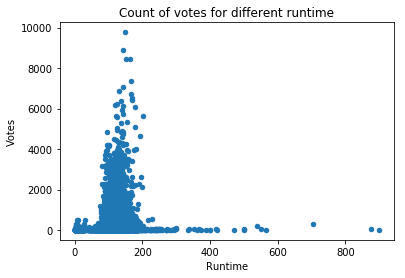

In [19]:
df.plot.scatter('runtime','vote_count');
addLabelsOnGraphs('Runtime','Votes','Count of votes for different runtime',plt);

### Higher runtime movies has low vote counts, while low runtime movies has variable vote_counts

<a id='q5'></a>
### Research Question 5: Which year has the most revenue?

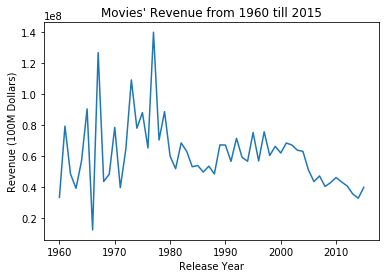

In [33]:
mean=df.groupby('release_year')['revenue_adj'].mean().plot()
addLabelsOnGraphs('Release Year','Revenue (100M Dollars)','Movies\' Revenue from 1960 till 2015',plt);

### I used the revenue_adj column as it counts for inflation which should be more accurate than normal revenue. Movies revenue Peaked between 

<a id='q6'></a>
### Research Question 6: Which month generates the most popularity?

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

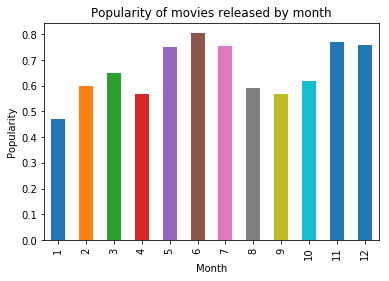

In [20]:
df['month'] = pd.DatetimeIndex(df['release_date']).month
df.groupby('month').popularity.mean().plot(kind='bar');
addLabelsOnGraphs('Month','Popularity','Popularity of movies released by month',plt)

### June generates the most popularity for movies, while movies that are released in January has the lowest popularity.

<a id='q7'></a>
### Research Question 7: Top 10 directors that generate popularity

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

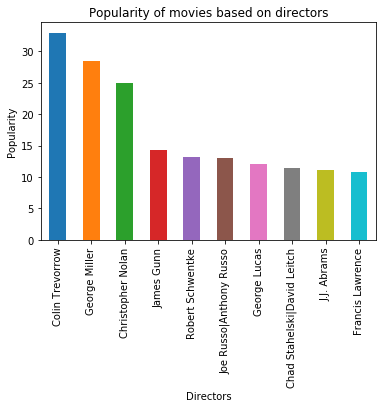

In [21]:
df.groupby('director').popularity.max().sort_values(ascending=False)[0:10].plot(kind='bar');
addLabelsOnGraphs('Directors','Popularity','Popularity of movies based on directors',plt)

### Collin Treverrow is the movie director that directed popular movies.

<a id='q8'></a>
### Research Question 8: Top 10 genres that generate revenue

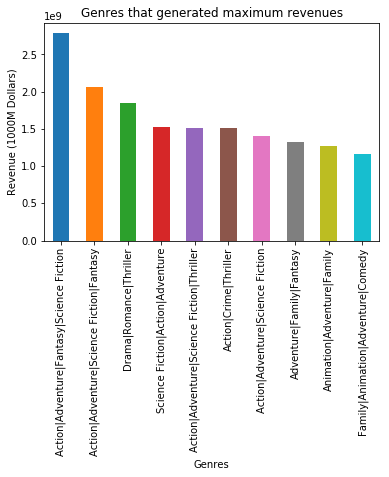

In [34]:
df.groupby('genres').revenue.max().sort_values(ascending=False)[0:10].plot(kind='bar');
addLabelsOnGraphs('Genres','Revenue (1000M Dollars)','Genres that generated maximum revenues',plt);

### The genre that generated the most revenue is: Action|Adventure|Fantasy|Science Fiction

<a id='q9'></a>
### Research Question 9: Highest average votes for 10 movies

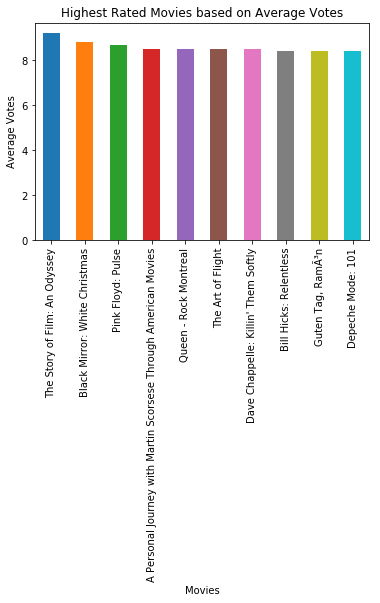

In [25]:
df.groupby('original_title').vote_average.max().sort_values(ascending=False)[0:10].plot(kind='bar');
addLabelsOnGraphs('Movies','Average Votes','Highest Rated Movies based on Average Votes',plt);

### This plot shows highest rated movies in this dataset.

<a id='q10'></a>
### Research Question 10: Does the budget affect ratings?

In [19]:
#dividing the dataset into two sets; movies with higher budget than the average
high_budget=cleanDf[cleanDf['budget'] > cleanDf['budget'].mean()]
high_budget.vote_average.mean()

6.1306915306915313

In [20]:
#dividing the dataset into two sets; movies with lower budget than the average
low_budget=cleanDf[cleanDf['budget'] < cleanDf['budget'].mean()]
low_budget.vote_average.mean()

6.1877829820452774

### There is nearly no differnce between low budget movies and high budget movies.

<a id='q11'></a>
### Research Question 11: Popularity Trending Over Time

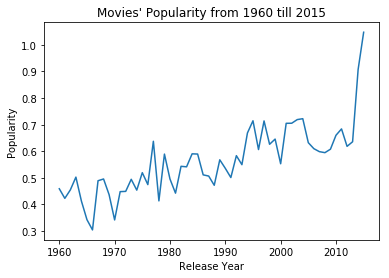

In [26]:
mean=df.groupby('release_year')['popularity'].mean().plot()
addLabelsOnGraphs('Release Year','Popularity','Movies\' Popularity from 1960 till 2015',plt);

<a id='q12'></a>
### Research Question 12: Runtime Trending Over Time

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

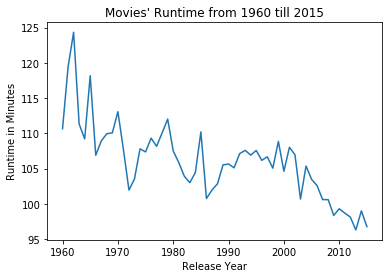

In [31]:
mean=df.groupby('release_year')['runtime'].mean().plot()
addLabelsOnGraphs('Release Year','Runtime in Minutes','Movies\' Runtime from 1960 till 2015',plt)

<a id='conclusions'></a>
## Conclusions
In the first phase of this analysis, I started with cleaning the data; removing extra columns, filling missing data and removing missing rows.
The second phase is the insights in this dataset, which showed:
That 2014 had the most released number of movies. <br>
The highest revenue movie is Avatar.<br>
The highest budget movie is The Warrior's Way<br>
The lowest budget movie was shared between 2 movies: Lost & Found - Love, Wedding, Marriage.<br>
The action genre is the most genre that generated revenue.<br>
The scatter plot showed that high runtime movies has very low vote counts, while normal runtime movies had a variation in vote counts.<br>
The line chart between release year and revenue_adj showed that movies revenue peaked between 1970 and 1980.<br>
June has a higher chance for a movie to be popular while January has the lowest popularity.<br>
Collin Treverrow is the director that generates the most popularity for movies.<br>
The genre that generated the most revenue is: Action|Adventure|Fantasy|Science Fiction.<br>
Highest average votes for a movie is The Story of Film: An Odyssey.<br>
The difference between high budget movies and low budget movies in ratings is very low based on this dataset.<br>
Movies Popularity started increasing greatly since 2010. <br>
Movies runtime decreased greatly over time. <br>

<a id='limit'></a>
## Limitations
1- Missing Values in too many columns with a high number of missing rows which had to be either dropped or filled.<br>
2- This analysis doesn't involve statistical inference.<br>
3- budget and revenue aren't specified to a currency so I assumed it in dollars.<br>

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0